In [73]:
import numpy as np
from qiskit import QuantumCircuit, QuantumRegister, transpile
from qiskit.circuit.random import random_circuit

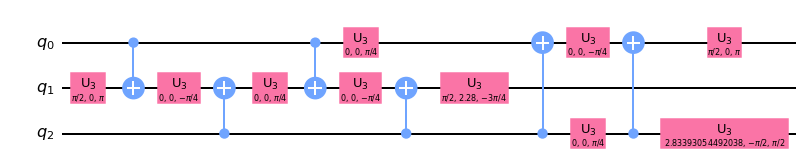

In [78]:
N_qubits = 3

#qr_test = QuantumRegister(N_qubits, name = "q")
#qc_test = QuantumCircuit(qr_test, name="test")

#qc_test.x(qr_test[1])
#qc_test.cx(qr_test[0],qr_test[1])

qc_test = transpile(random_circuit(num_qubits = N_qubits, depth = 2, measure=False), basis_gates=["cx","u3","id"])
qc_test.draw(output="mpl")

In [49]:
qc_test.count_ops()["cx"]

1

In [50]:
qasm_qc = qc_test.qasm()
lines = []
i=0
while i<len(qasm_qc):
    line = ""
    end = False
    while end == False:
        if qasm_qc[i] != "\n":
            line+=qasm_qc[i]
        else:
            end=True
            lines.append(line)
        i+=1
    

In [60]:
def add_random_coupling_cnot(qc, control, target):
    choices = ["IIII", "YIYX", "XIXX", "ZIZI", 
               "IXIX", "YXYI", "XXXI", "ZXZX", 
               "IYZY", "YYXZ", "XYYZ", "ZYIY", 
               "IZZZ", "YZXY", "XZYY", "ZZIZ"]
    
    pqrs = np.random.choice(choices)

    if pqrs[0]=='X':
        qc.x(control)
    elif pqrs[0]=='Y':
        qc.y(control)
    elif pqrs[0]=='Z':
        qc.z(control)
    
    if pqrs[1]=='X':
        qc.x(target)
    elif pqrs[1]=='Y':
        qc.y(target)
    elif pqrs[1]=='Z':
        qc.z(target)
    
    qc.cx(control, target)

    if pqrs[2]=='X':
        qc.x(control)
    elif pqrs[2]=='Y':
        qc.y(control)
    elif pqrs[2]=='Z':
        qc.z(control)
    
    if pqrs[3]=='X':
        qc.x(target)
    elif pqrs[3]=='Y':
        qc.y(target)
    elif pqrs[3]=='Z':
        qc.z(target)

    return

In [69]:
splitted = qasm_qc.split(";\n")

qr_LIC = QuantumRegister(N_qubits, name="q")
qc_LIC = QuantumCircuit(qr_LIC, name="LIC")

target_pos = []
control_pos = []

for element in splitted:
    if "cx" in element:
        el = element.replace("q[", "")
        el = el.replace("]", "")
        control_target = el.split(" ")[1].split(",")

        add_random_coupling_cnot(qc_LIC, qr_LIC[int(control_target[0])], qr_LIC[int(control_target[1])])

qc_LIC.draw()

┌───┐          
q_0: ┤ Z ├──■───────
     ├───┤┌─┴─┐┌───┐
q_1: ┤ Z ├┤ X ├┤ Z ├
     └───┘└───┘└───┘